In [14]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
training_data_path = '../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv'
df = pd.read_csv(training_data_path)
print(f'{df.shape=}')
df.sample(5)

df.shape=(23760, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
1515,0.000000,-1.758559,-3.300729,-3.357895,-6.301054,-4.957212,-9.301358,-6.556567,-12.301703,-7.752069,-15.464058,-7.057419,-18.725301,-4.639002,-21.075567,-1.489789,-22.325989,1.842136,-22.997714
17960,-0.449092,0.596093,-2.586750,-1.983257,-5.772239,-2.978647,-8.151341,-4.864776,-12.233714,-5.190069,-14.898081,-8.273220,-17.164772,-8.459276,-20.210151,-10.263273,-22.493534,-9.413093,-25.072246
5058,0.300000,-2.961637,-3.592515,-6.110842,-4.842941,-9.442763,-5.514680,-12.793903,-6.071892,-16.191367,-6.192416,-19.588150,-6.213602,-22.725449,-5.075563,-24.476293,-2.232810,-24.412438,1.233291
21547,-0.124179,3.437836,-0.978198,3.993714,-6.127955,2.761096,-10.362268,-1.550065,-13.259936,-5.082158,-13.892036,-8.343447,-14.589134,-11.932241,-14.503622,-15.486917,-15.533990,-19.774681,-14.746766
3319,-0.000000,-1.021461,4.996635,-1.702417,8.327715,-2.155412,11.688059,-0.923007,14.784515,1.861831,16.686219,5.189979,17.231579,8.534695,16.653511,11.578472,15.196445,13.924003,12.744802


In [16]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19008, 18), (4752, 18), (19008,), (4752,))

In [17]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.layers import BatchNormalization, LSTM, Dense, Reshape
from keras.models import Model

model = Sequential([
    BatchNormalization(input_shape=(18,)),
    Reshape((9, 2)),  # reshape to sequence
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)
])

name = 'lstm'
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_{name}_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 reshape_1 (Reshape)         (None, 9, 2)              0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               67072     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,465
Trainable params: 75,429
Non-trainable params: 36
_________________________________________________

In [18]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/100
594/594 [==============================] - 5s 7ms/step - loss: 0.0443 - mae: 0.1626 - val_loss: 0.0247 - val_mae: 0.1222
Epoch 2/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0247 - mae: 0.1197 - val_loss: 0.0154 - val_mae: 0.0926
Epoch 3/100
594/594 [==============================] - 3s 6ms/step - loss: 0.0218 - mae: 0.1117 - val_loss: 0.0148 - val_mae: 0.0909
Epoch 4/100
594/594 [==============================] - 3s 6ms/step - loss: 0.0201 - mae: 0.1070 - val_loss: 0.0119 - val_mae: 0.0811
Epoch 5/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0189 - mae: 0.1045 - val_loss: 0.0119 - val_mae: 0.0801
Epoch 6/100
594/594 [==============================] - 4s 7ms/step - loss: 0.0184 - mae: 0.1020 - val_loss: 0.0121 - val_mae: 0.0823
Epoch 7/100
594/594 [==============================] - 4s 7ms/step - loss: 0.0175 - mae: 0.1003 - val_loss: 0.0122 - val_mae: 0.0812
Epoch 8/100
594/594 [==============================] - 4s 7ms/step - 

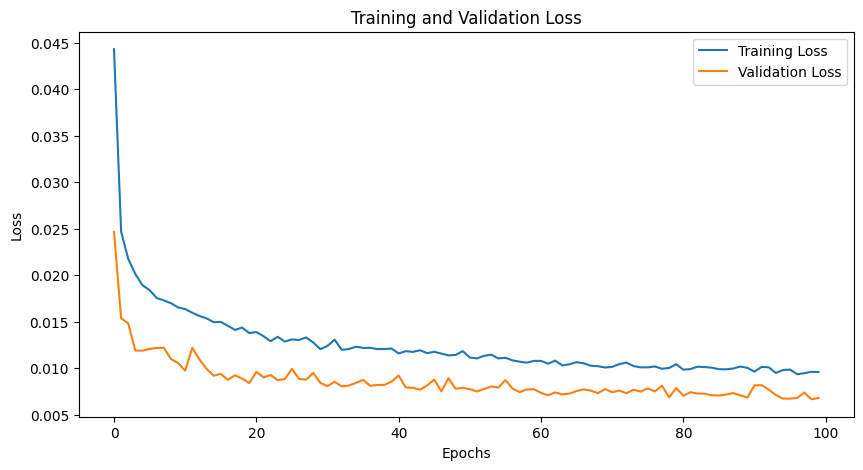

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

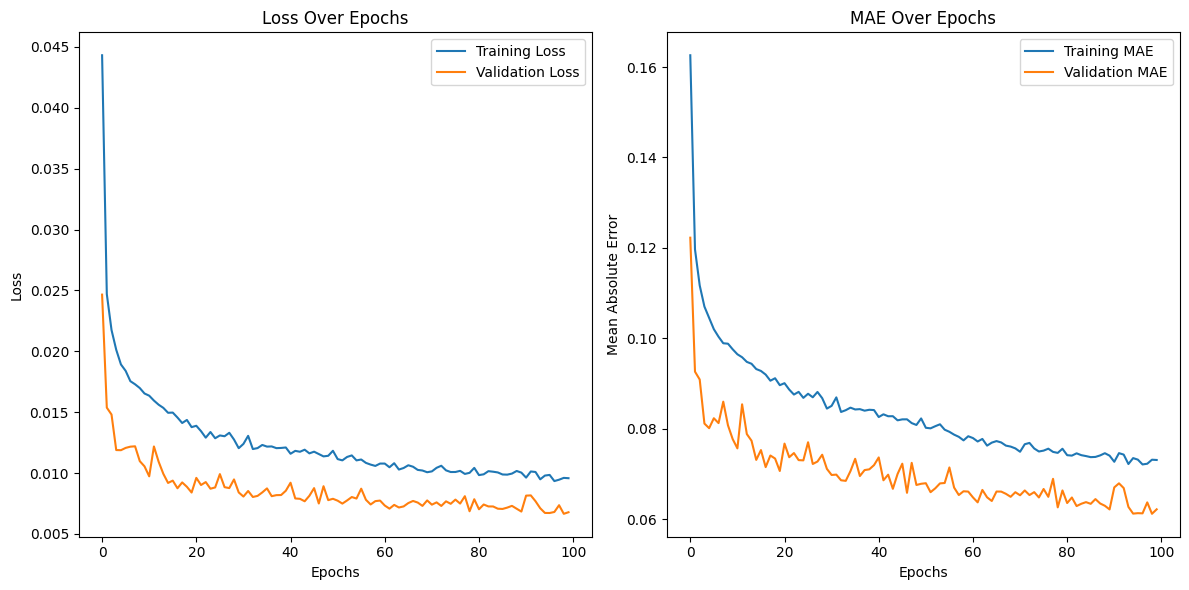

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [21]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

149/149 [==============================] - 1s 2ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.006656
1,Mean Absolute Error (MAE),0.061165
2,R-squared (R2),0.876987


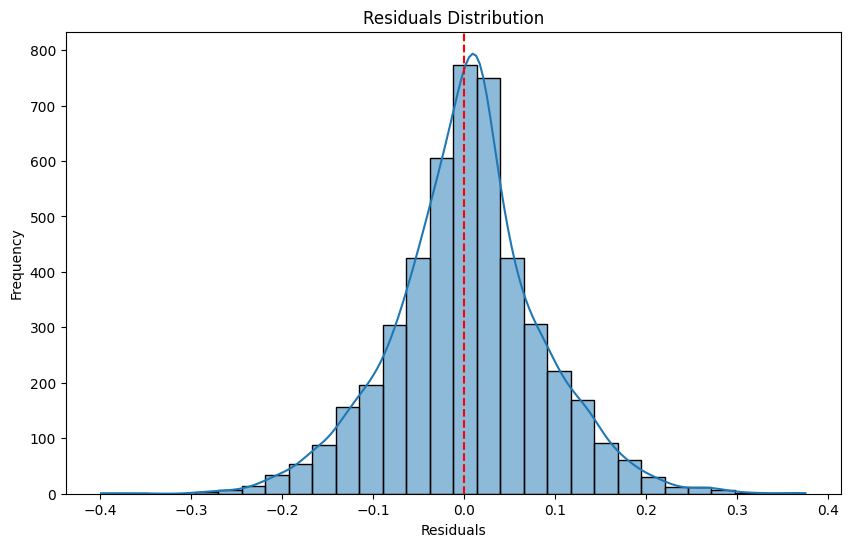

In [22]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

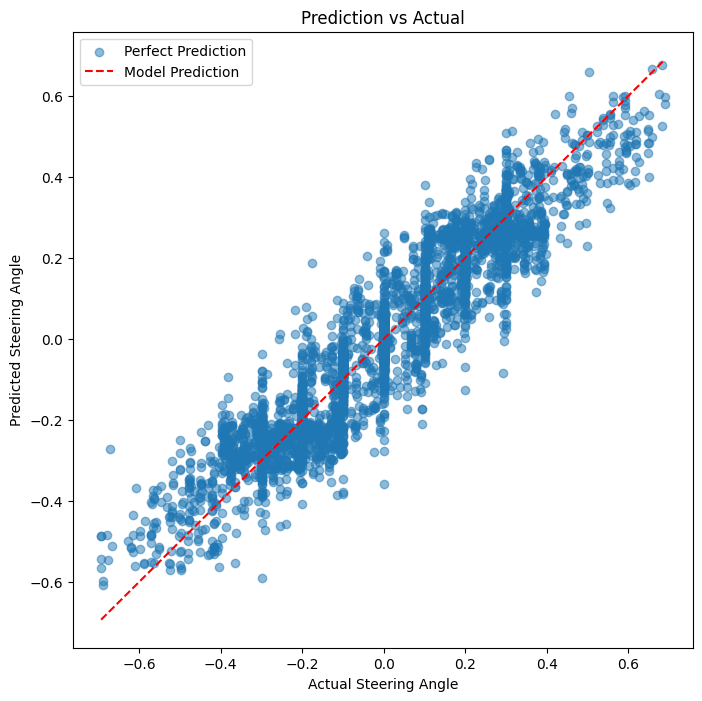

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [ ]:
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [25]:
metadata = {
    "model_name": name,
    "model_path": f"../models/{name}.json",
    "training_data_path": training_data_path,
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        entry = json.dumps(metadata) + "\n"
        if entry not in lines:
            f.write(entry)
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [26]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "transformer_2_32_128_64",
    "model_path": "../models/transformer_2_32_128_64.json",
    "training_data_path": "../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv",
    "timestamp": "20250603_163324",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_lstm_20250603_163324.h5",
        "final_training_loss": 0.00957880076020956,
        "final_validation_loss": 0.006783469580113888
    },
    "evaluation": {
        "mse": 0.0066555580763497345,
        "mae": 0.0611653653777072,
        "r2": 0.8769874169351973
    }
}
